<a href="https://colab.research.google.com/github/vdalal/dataanalysiswithpython/blob/master/Exercises_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/58563302-42466a80-8201-11e9-9948-b3e9f88a5662.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# Exercises
## Bike store sales

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [2]:
# reference: https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-course/data-analysis-example-a
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
!wget https://raw.githubusercontent.com/ine-rmotr-curriculum/FreeCodeCamp-Pandas-Real-Life-Example/master/data/sales_data.csv

--2023-06-04 17:20:17--  https://raw.githubusercontent.com/ine-rmotr-curriculum/FreeCodeCamp-Pandas-Real-Life-Example/master/data/sales_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15127245 (14M) [text/plain]
Saving to: ‘sales_data.csv’

sales_data.csv      100%[===================>]  14.43M  --.-KB/s    in 0.05s   

2023-06-04 17:20:17 (286 MB/s) - ‘sales_data.csv’ saved [15127245/15127245]



In [4]:
sales = pd.read_csv(
    'sales_data.csv',
    parse_dates=['Date'])

In [5]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [4]:
sales.shape

(113036, 18)

In [8]:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [9]:
sales['Unit_Cost'].mean()

267.296365759581

In [10]:
sales['Unit_Cost'].median()

9.0

<Axes: >

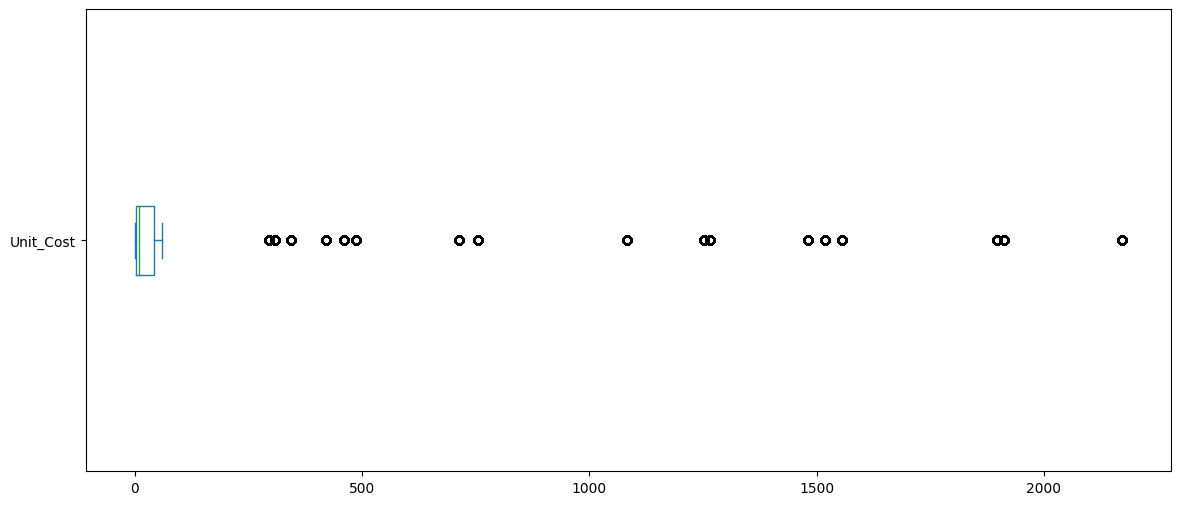

In [11]:
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6))

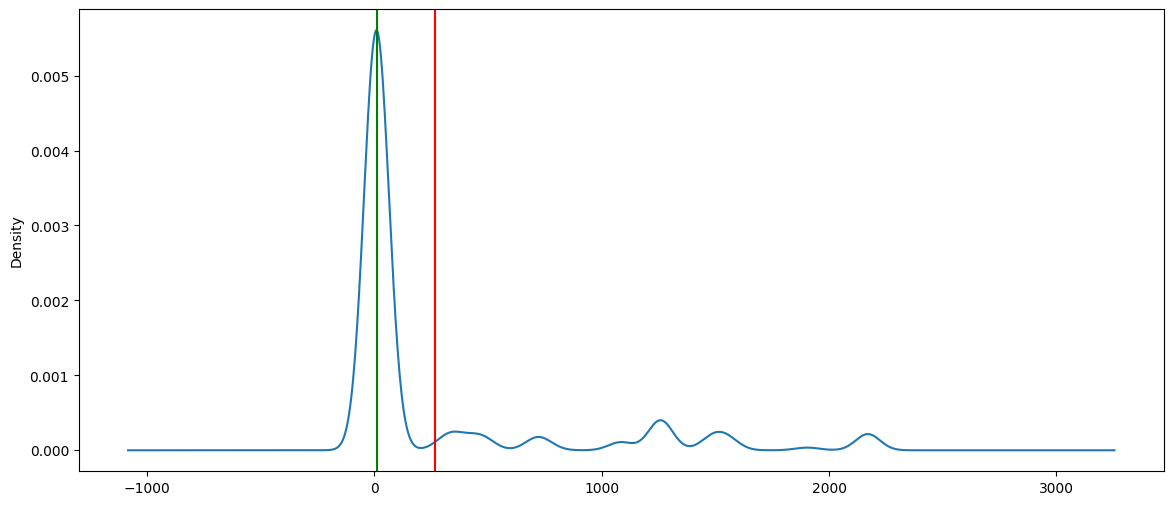

In [14]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(sales['Unit_Cost'].mean(), color='red')
ax.axvline(sales['Unit_Cost'].median(), color='green')

Text(0.5, 0, 'Dollars')

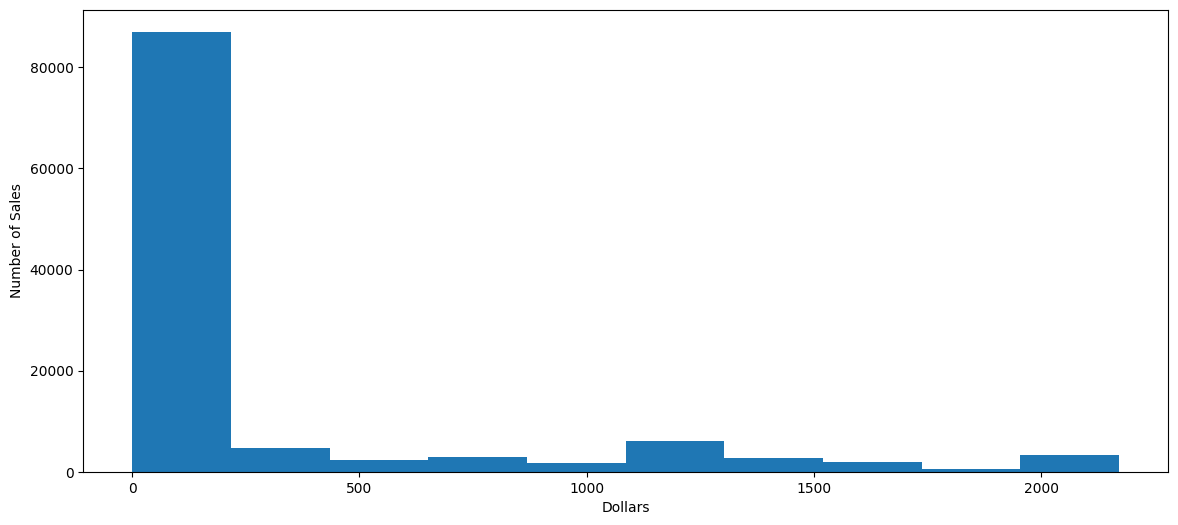

In [15]:
ax = sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('Dollars')

Text(0.5, 0, 'Dollars')

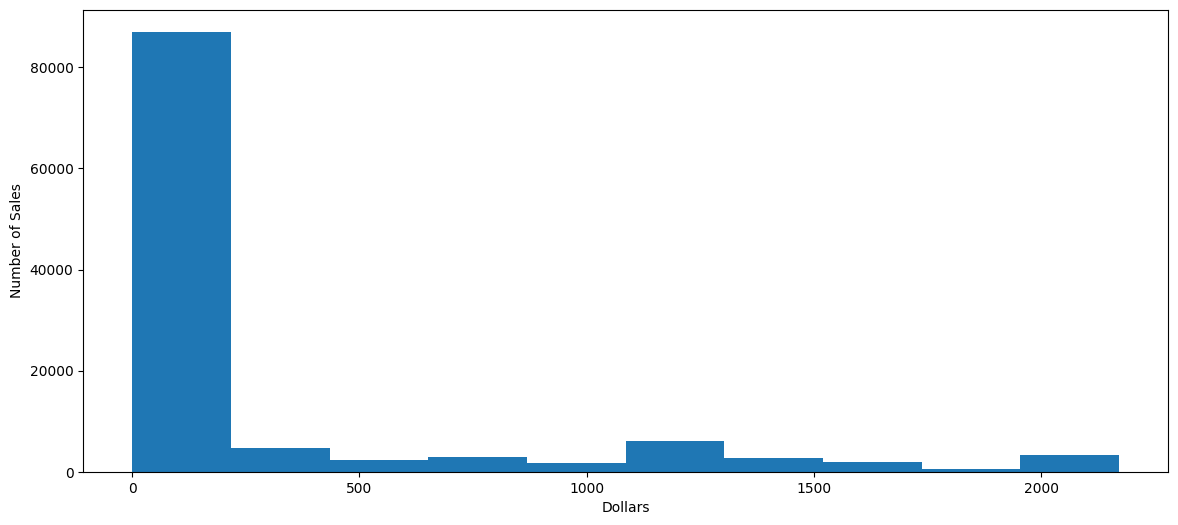

In [16]:
ax = sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('Dollars')

<Axes: ylabel='Age_Group'>

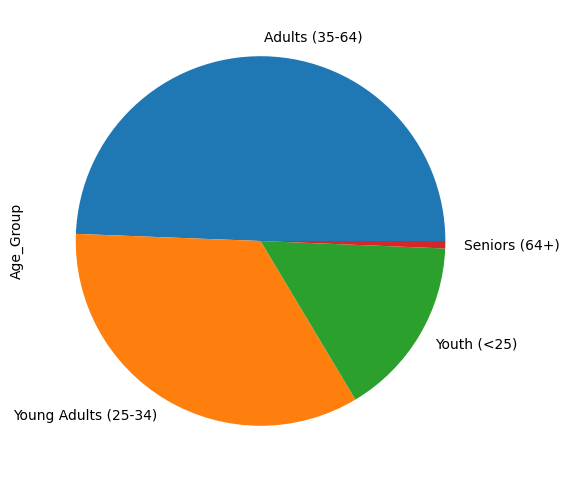

In [17]:
# Categorical analysis and vizualization
# Analyze the age_group columns
sales['Age_Group'].value_counts()
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(6,6))



Text(0, 0.5, 'Number of Sales')

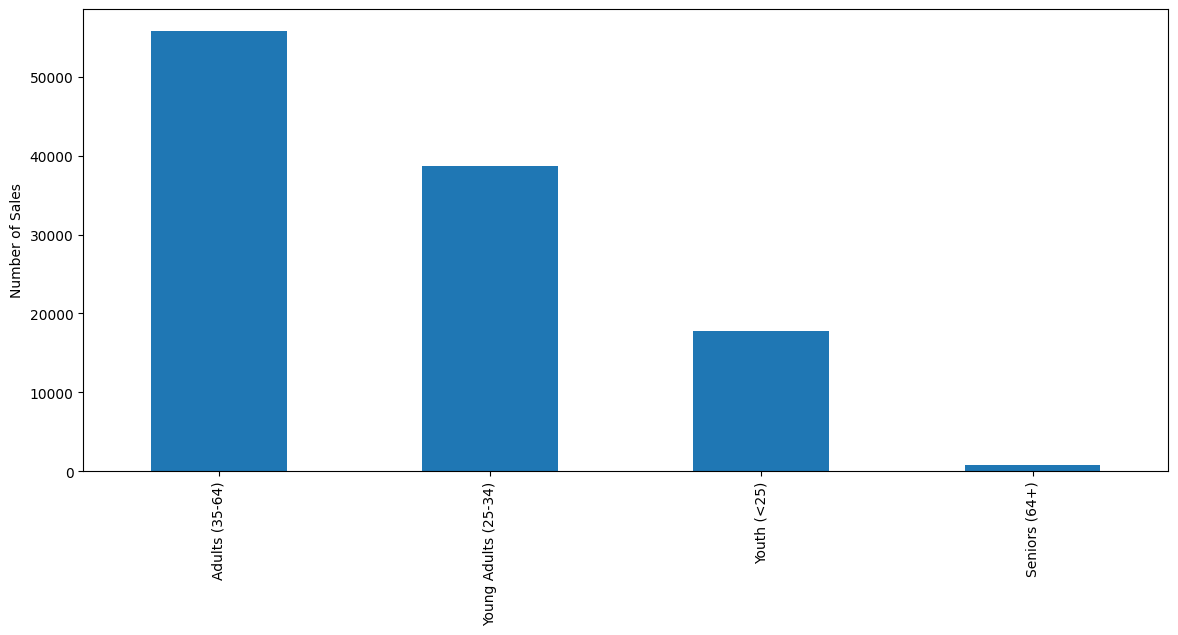

In [18]:
ax = sales['Age_Group'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Sales')

In [19]:
corr = sales.corr()
corr

<ipython-input-19-9ba3b0e08523>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sales.corr()


,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


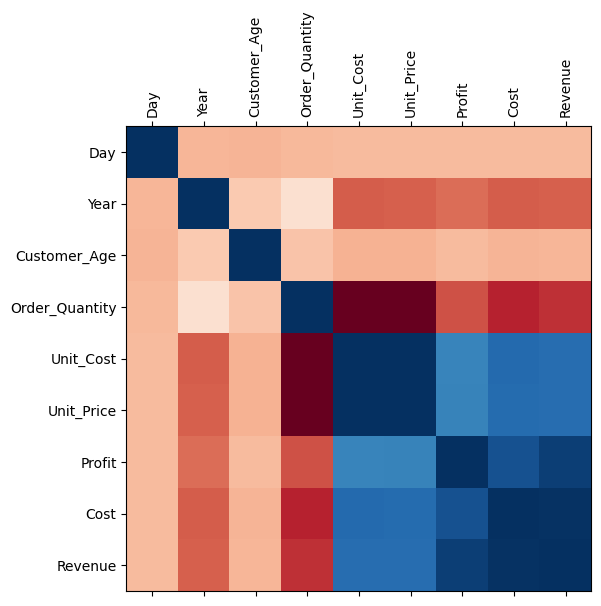

In [22]:
fig = plt.figure(figsize=(14,6))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);
# Dark blue = high correlation & Dark Red = low correlation

<Axes: xlabel='Revenue', ylabel='Profit'>

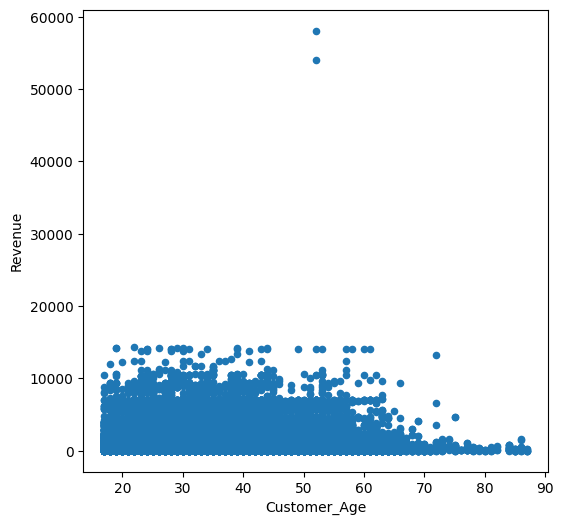

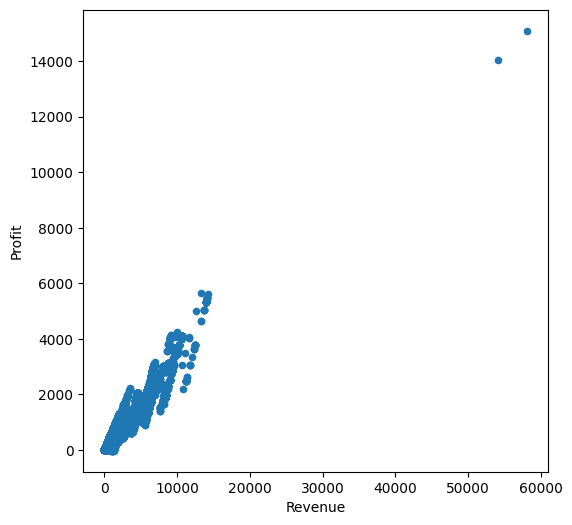

In [25]:
sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6))
sales.plot(kind='scatter', x='Revenue', y='Profit', figsize=(6,6))



Text(0, 0.5, 'Profit')

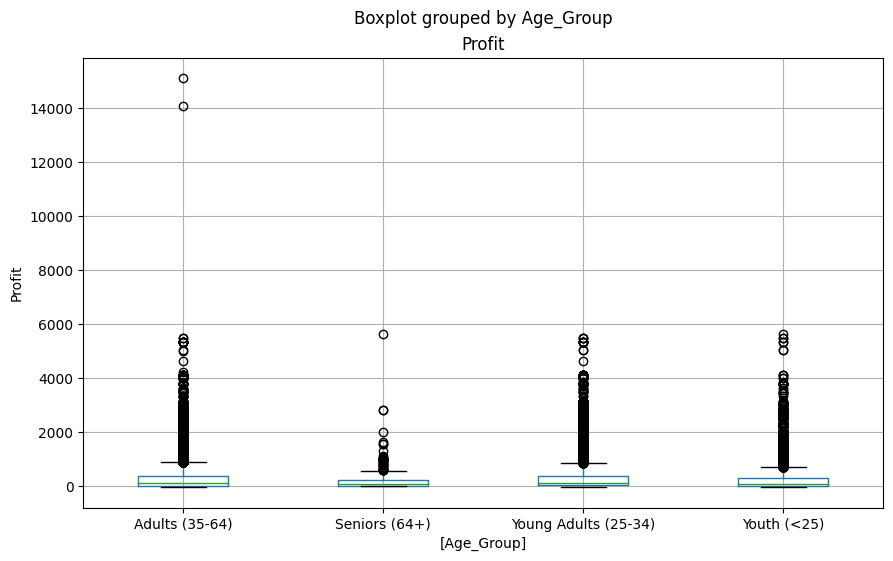

In [26]:
ax = sales[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10,6))
ax.set_ylabel('Profit')

Year                 Axes(0.125,0.53;0.227941x0.35)
Customer_Age      Axes(0.398529,0.53;0.227941x0.35)
Order_Quantity    Axes(0.672059,0.53;0.227941x0.35)
Unit_Cost            Axes(0.125,0.11;0.227941x0.35)
Unit_Price        Axes(0.398529,0.11;0.227941x0.35)
Profit            Axes(0.672059,0.11;0.227941x0.35)
dtype: object

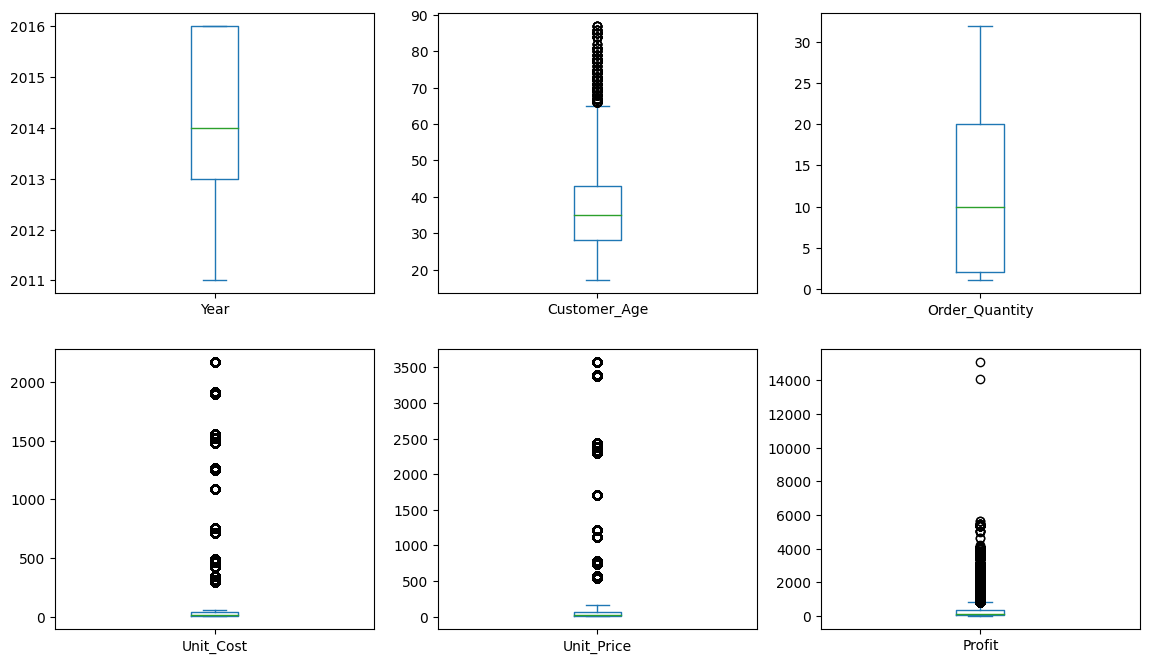

In [28]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']
sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

In [6]:
# Column wrangling
# https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-course/data-analysis-example-b
sales['Revenue_per_Age'] = sales['Revenue'] / sales['Customer_Age']
sales['Revenue_per_Age'].head()


0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

<Axes: ylabel='Frequency'>

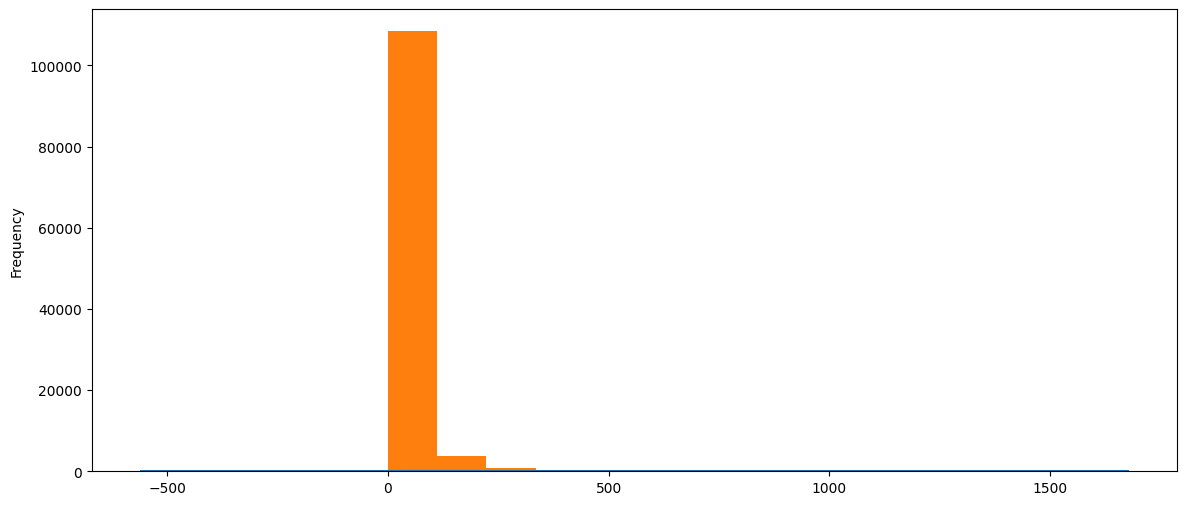

In [10]:
sales['Revenue_per_Age'].plot(kind='density', figsize=(14,6))

<Axes: ylabel='Frequency'>

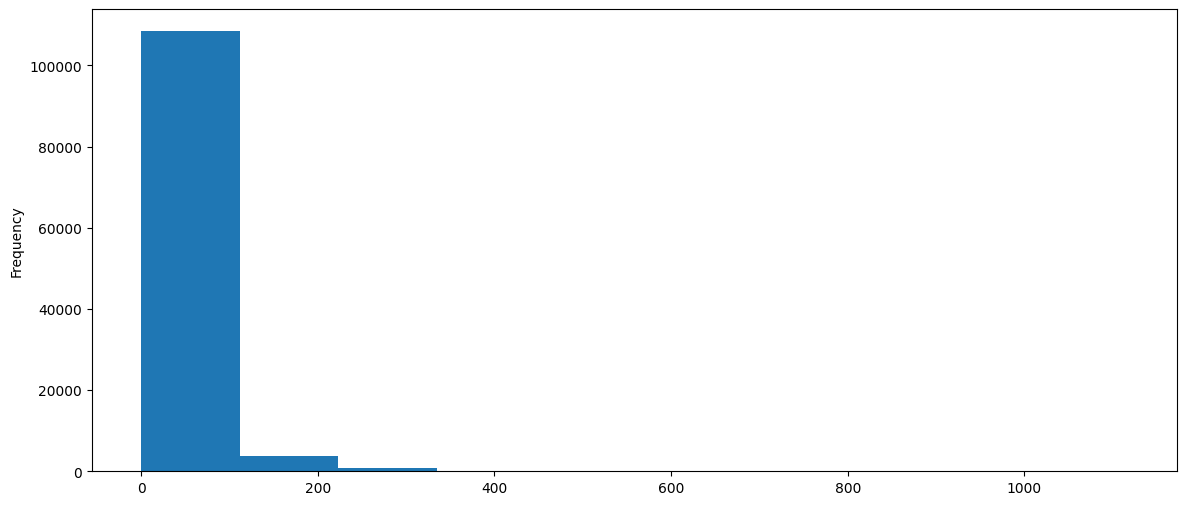

In [9]:
sales['Revenue_per_Age'].plot(kind='hist', figsize=(14,6))

<Axes: ylabel='Frequency'>

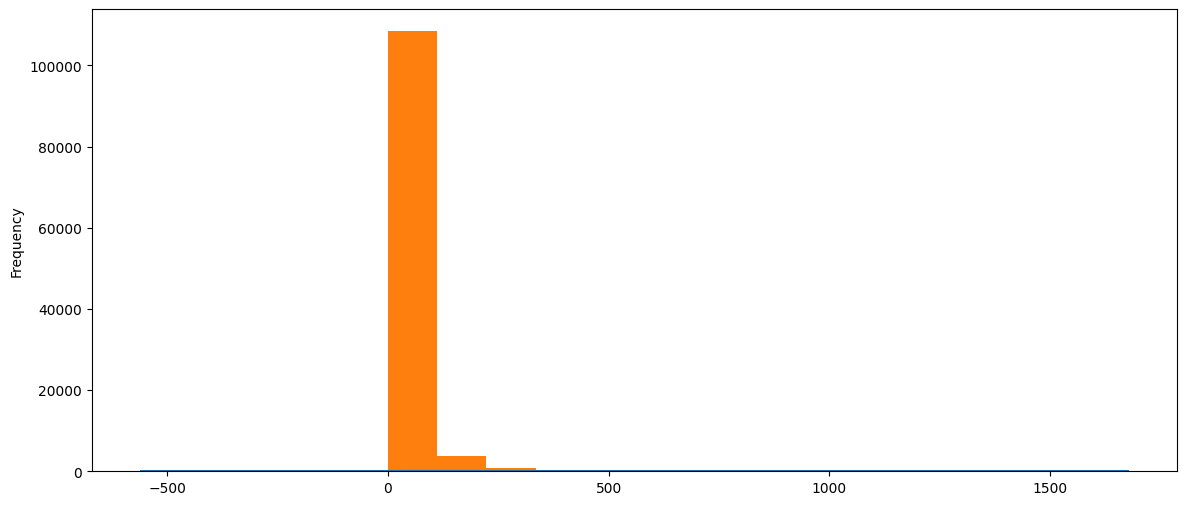

In [11]:
sales['Revenue_per_Age'].plot(kind='density', figsize=(14,6))
sales['Revenue_per_Age'].plot(kind='hist', figsize=(14,6))

In [12]:
# Add and calculate a new calculated_cost column
# Calculated_Cost = Order_Qty * Unit_Cost
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']
sales['Calculated_Cost'].head()


0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

In [14]:
sales['Calculated_Cost'] != sales['Cost'].sum()

0         True
1         True
2         True
3         True
4         True
          ... 
113031    True
113032    True
113033    True
113034    True
113035    True
Name: Calculated_Cost, Length: 113036, dtype: bool

In [16]:
(sales['Calculated_Cost'] != sales['Cost']).sum()

0

<Axes: xlabel='Calculated_Cost', ylabel='Profit'>

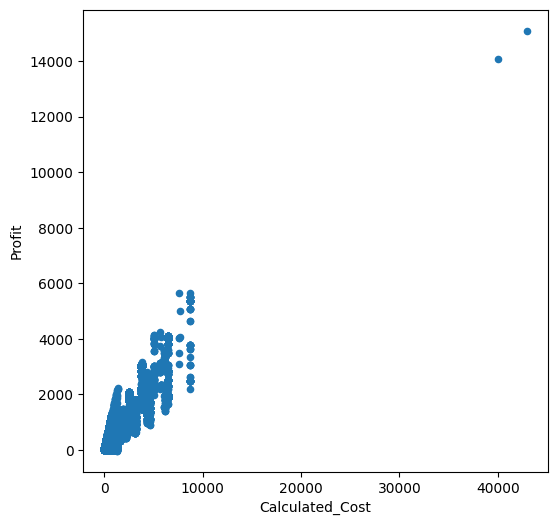

In [17]:
sales.plot(kind='scatter', x='Calculated_Cost', y='Profit', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `Customers_Age`?

In [ ]:
# your code goes here


Why don't you try with `.mean()`

In [5]:
sales['Customer_Age'].mean()

35.91921157861212

Go ahead and show a <b>density (KDE)</b> and a <b>box plot</b> with the `Customer_Age` data:

In [ ]:
# your code goes here


<Axes: ylabel='Density'>

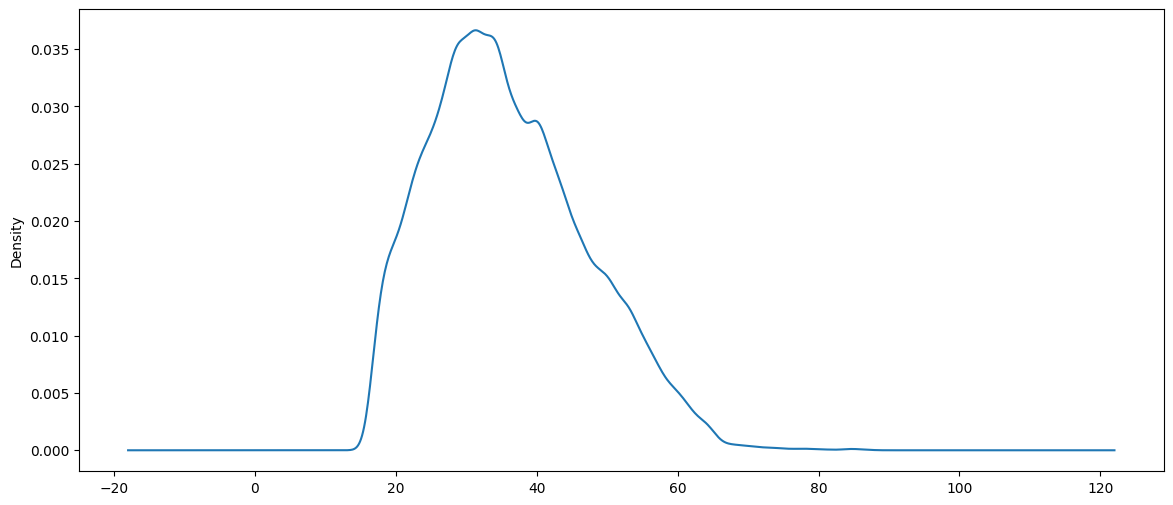

In [6]:
sales['Customer_Age'].plot(kind='kde', figsize=(14,6))

<Axes: >

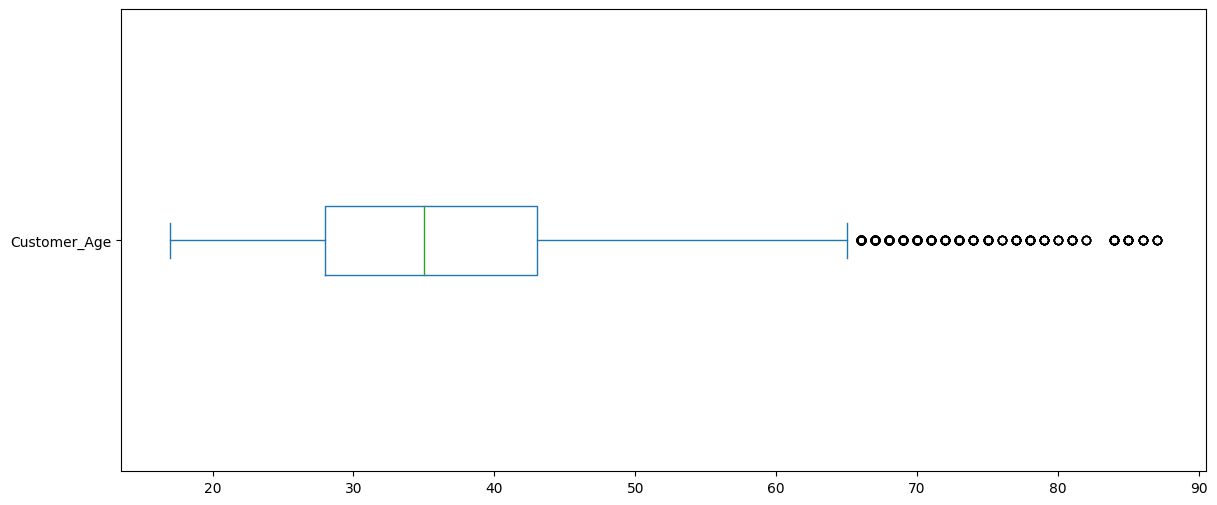

In [22]:
sales['Customer_Age'].plot(kind='box', vert=False, figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `Order_Quantity`?

In [ ]:
# your code goes here


In [23]:
sales['Order_Quantity'].mean()

11.901659648253654

Go ahead and show a <b>histogram</b> and a <b>box plot</b> with the `Order_Quantity` data:

In [ ]:
# your code goes here


<Axes: ylabel='Frequency'>

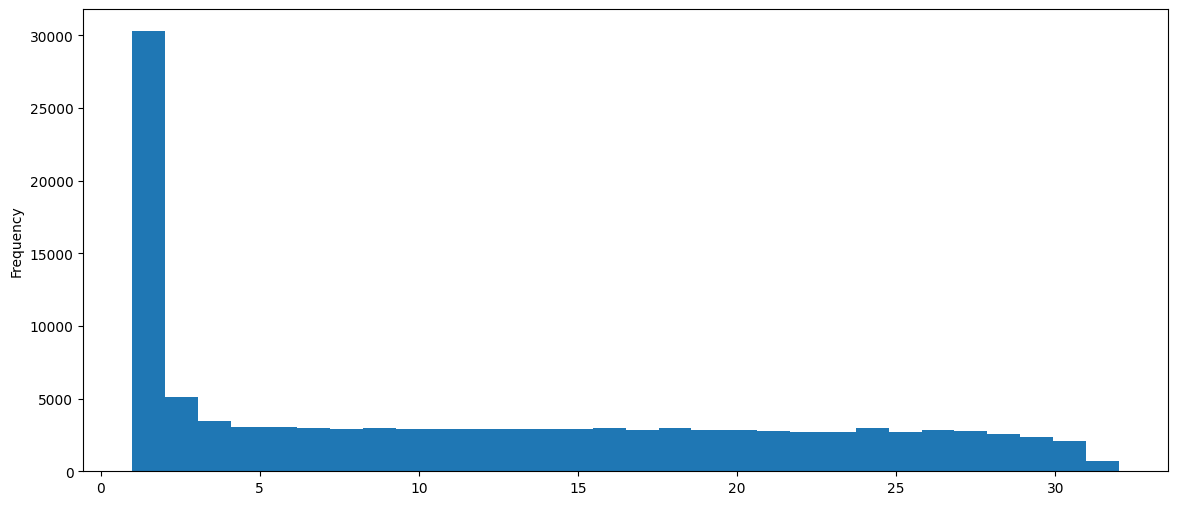

In [24]:
sales['Order_Quantity'].plot(kind='hist', bins=30, figsize=(14,6))

<Axes: >

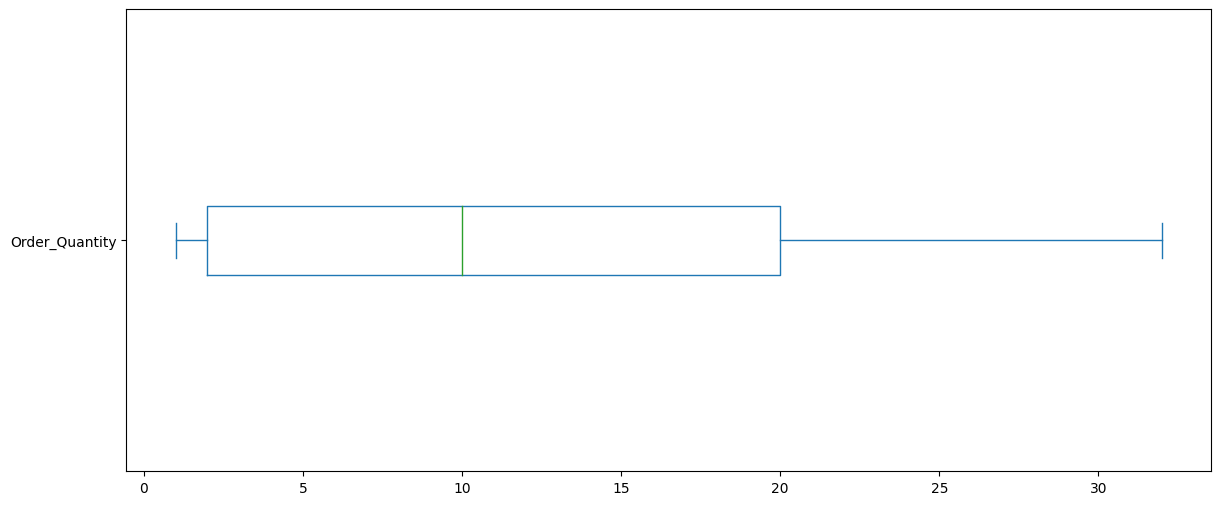

In [25]:
sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales per year do we have?

In [ ]:
# your code goes here


In [26]:
sales['Year'].value_counts()

2014    29398
2016    29398
2013    24443
2015    24443
2012     2677
2011     2677
Name: Year, dtype: int64

Go ahead and show a <b>pie plot</b> with the previous data:

In [ ]:
# your code goes here


<Axes: ylabel='Year'>

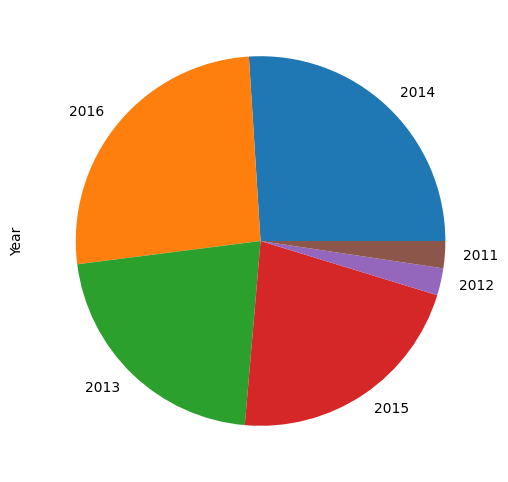

In [27]:
sales['Year'].value_counts().plot(kind='pie', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales per month do we have?

In [ ]:
# your code goes here


In [29]:
sales['Month'].value_counts()

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

Go ahead and show a <b>bar plot</b> with the previous data:

In [ ]:
# your code goes here


<Axes: >

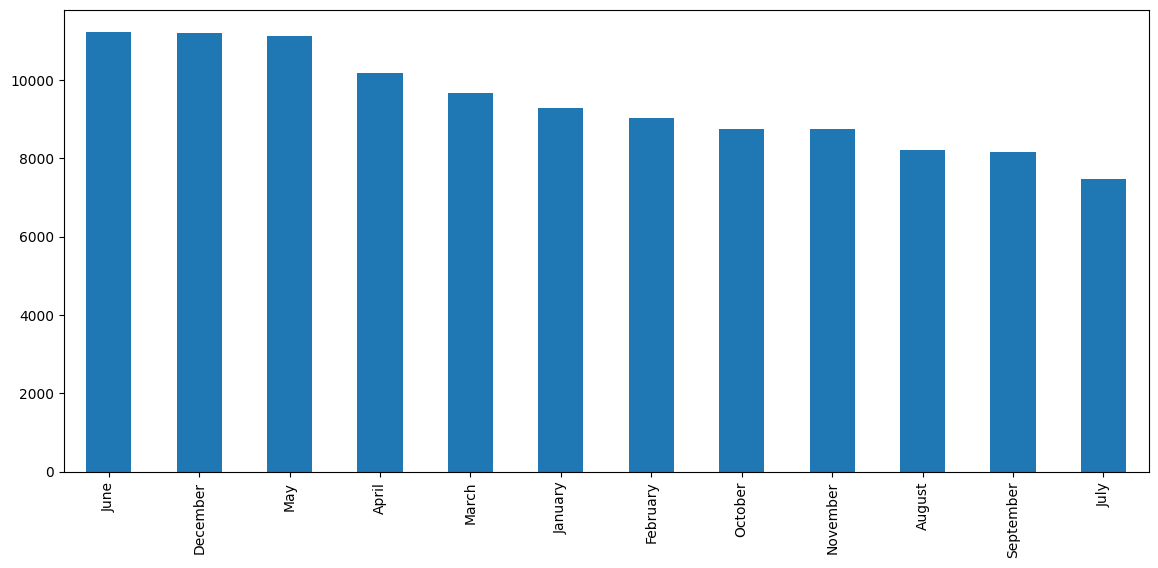

In [30]:
sales['Month'].value_counts().plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which country has the most sales `quantity of sales`?

In [ ]:
# your code goes here


In [31]:
sales['Country'].value_counts().head(1)

United States    39206
Name: Country, dtype: int64

In [32]:
sales['Country'].value_counts()

United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: Country, dtype: int64

Go ahead and show a <b>bar plot</b> of the sales per country:

In [ ]:
# your code goes here


<Axes: >

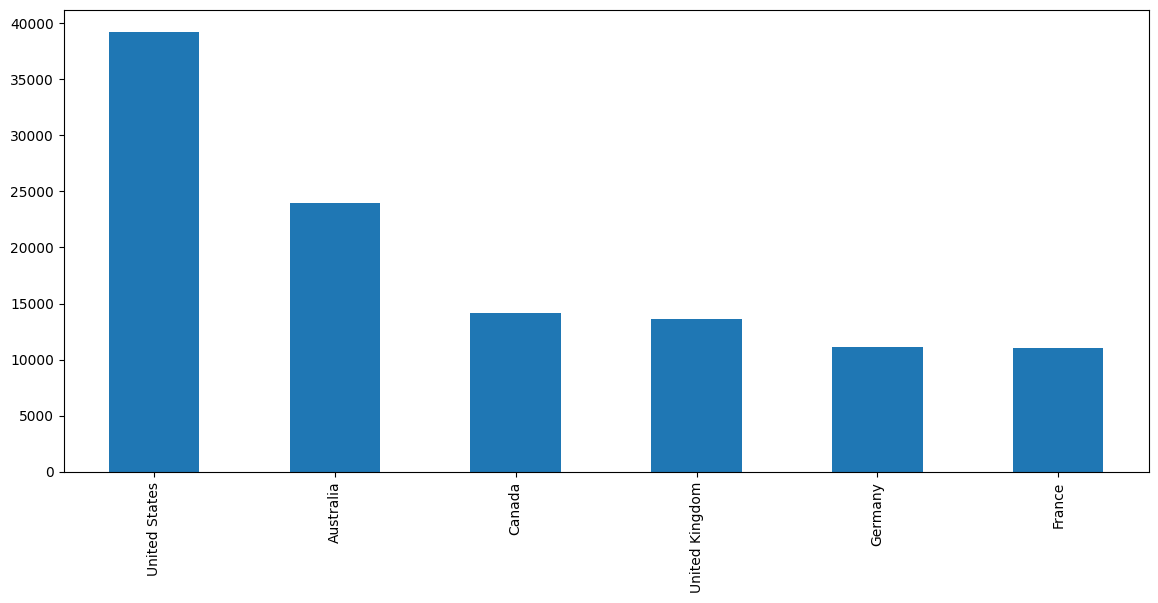

In [33]:
sales['Country'].value_counts().plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Create a list of every product sold

In [ ]:
# your code goes here


In [34]:
#sales.loc[:, 'Product'].unique()

sales['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

Create a **bar plot** showing the 10 most sold products (best sellers):

In [ ]:
# your code goes here


<Axes: >

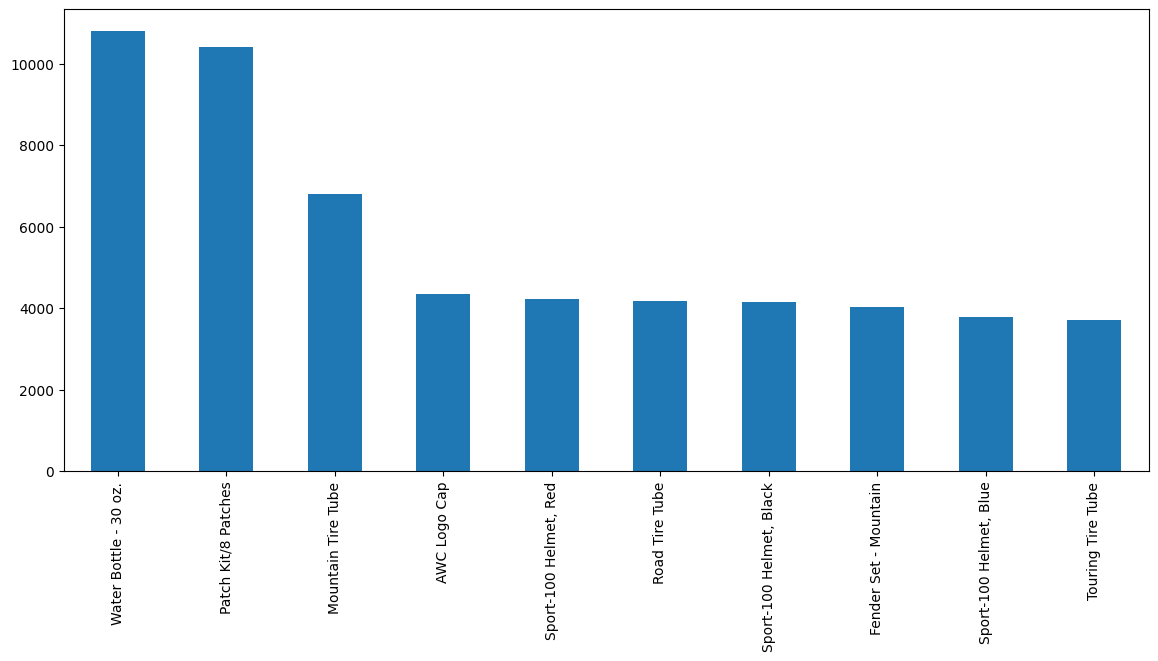

In [35]:
sales['Product'].value_counts().head(10).plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Unit_Cost` and `Unit_Price`?

Show a <b>scatter plot</b> between both columns.

In [ ]:
# your code goes here


<Axes: xlabel='Unit_Cost', ylabel='Unit_Price'>

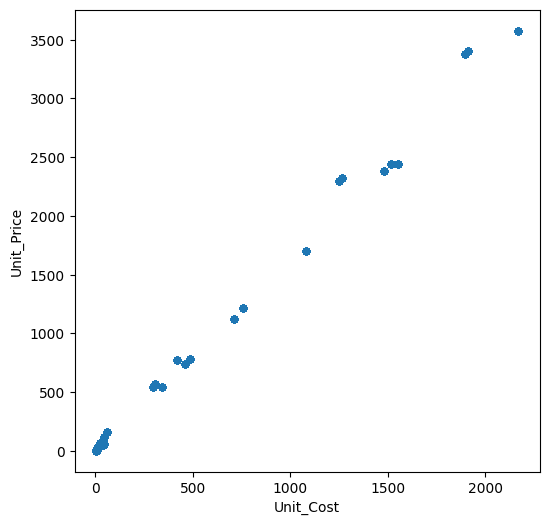

In [36]:
sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Order_Quantity` and `Profit`?

Show a <b>scatter plot</b> between both columns.

In [ ]:
# your code goes here


<Axes: xlabel='Order_Quantity', ylabel='Profit'>

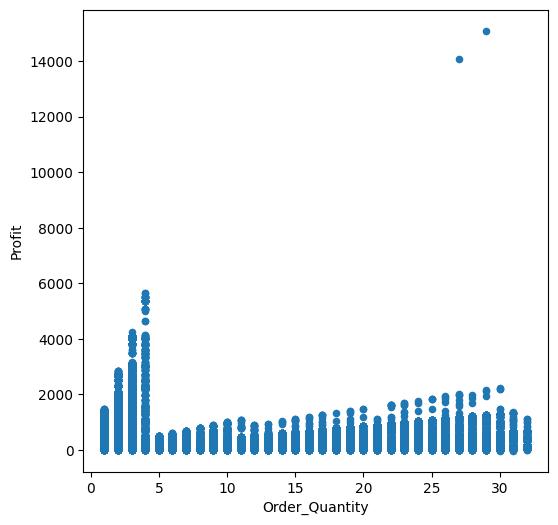

In [37]:
sales.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Profit` per `Country`?

Show a grouped <b>box plot</b> per country with the profit values.

In [ ]:
# your code goes here


<Axes: title={'center': 'Profit'}, xlabel='[Country]'>

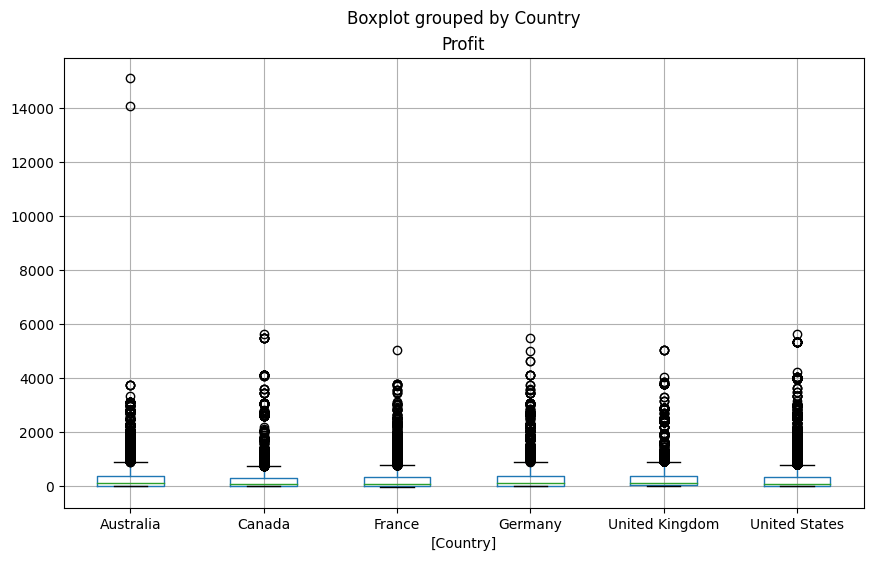

In [38]:
sales[['Profit', 'Country']].boxplot(by='Country', figsize=(10,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between the `Customer_Age` per `Country`?

Show a grouped <b>box plot</b> per country with the customer age values.

In [ ]:
# your code goes here


<Axes: title={'center': 'Customer_Age'}, xlabel='[Country]'>

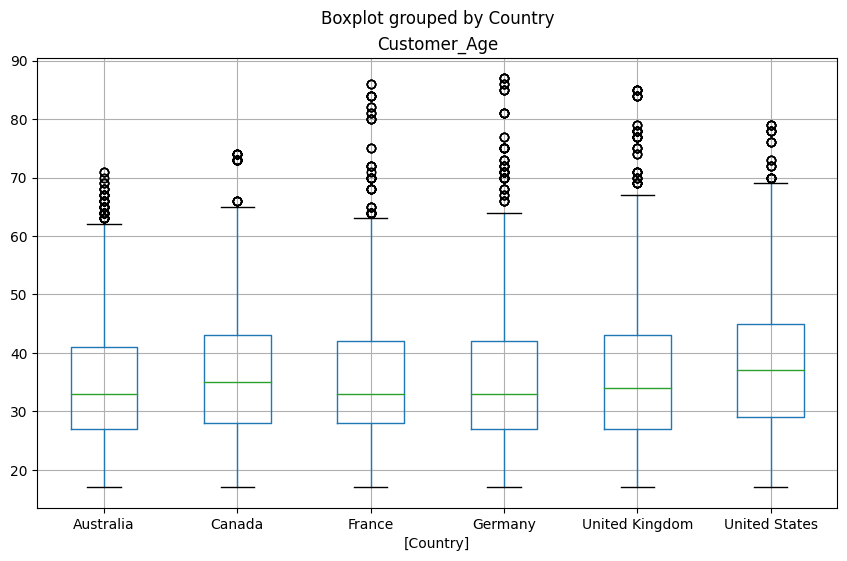

In [39]:
sales[['Customer_Age', 'Country']].boxplot(by='Country', figsize=(10,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add and calculate a new `Calculated_Date` column

Use `Day`, `Month`, `Year` to create a `Date` column (`YYYY-MM-DD`).

In [ ]:
# your code goes here


In [40]:
sales['Calculated_Date'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)

sales['Calculated_Date'].head()

0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Calculated_Date, dtype: object

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Parse your `Calculated_Date` column into a datetime object

In [ ]:
# your code goes here


In [41]:
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])

sales['Calculated_Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How did sales evolve through the years?

Show a <b>line plot</b> using `Calculated_Date` column as the x-axis and the count of sales as the y-axis.

In [ ]:
# your code goes here


<Axes: >

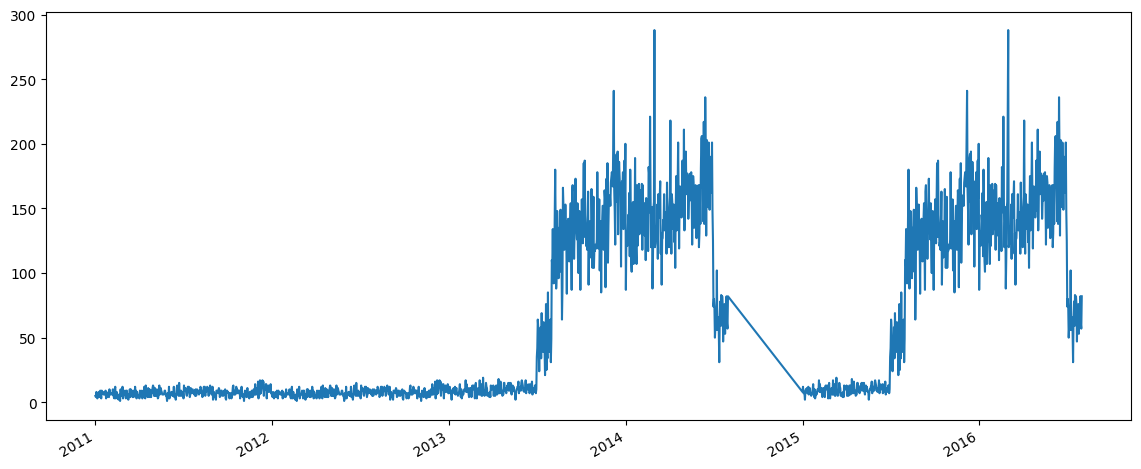

In [42]:
sales['Calculated_Date'].value_counts().plot(kind='line', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Increase 50 U$S revenue to every sale

In [ ]:
# your code goes here


In [44]:
#sales['Revenue'] = sales['Revenue'] + 50

sales['Revenue'] += 50

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in `Canada` or `France`?

In [ ]:
# your code goes here


In [45]:
sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

25176

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many `Bike Racks` orders were made from Canada?

In [ ]:
# your code goes here


In [46]:
sales.loc[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]

104

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in each region (state) of France?

In [ ]:
# your code goes here


In [47]:
france_states = sales.loc[sales['Country'] == 'France', 'State'].value_counts()

france_states

Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: State, dtype: int64

Go ahead and show a <b>bar plot</b> with the results:

In [ ]:
# your code goes here


<Axes: >

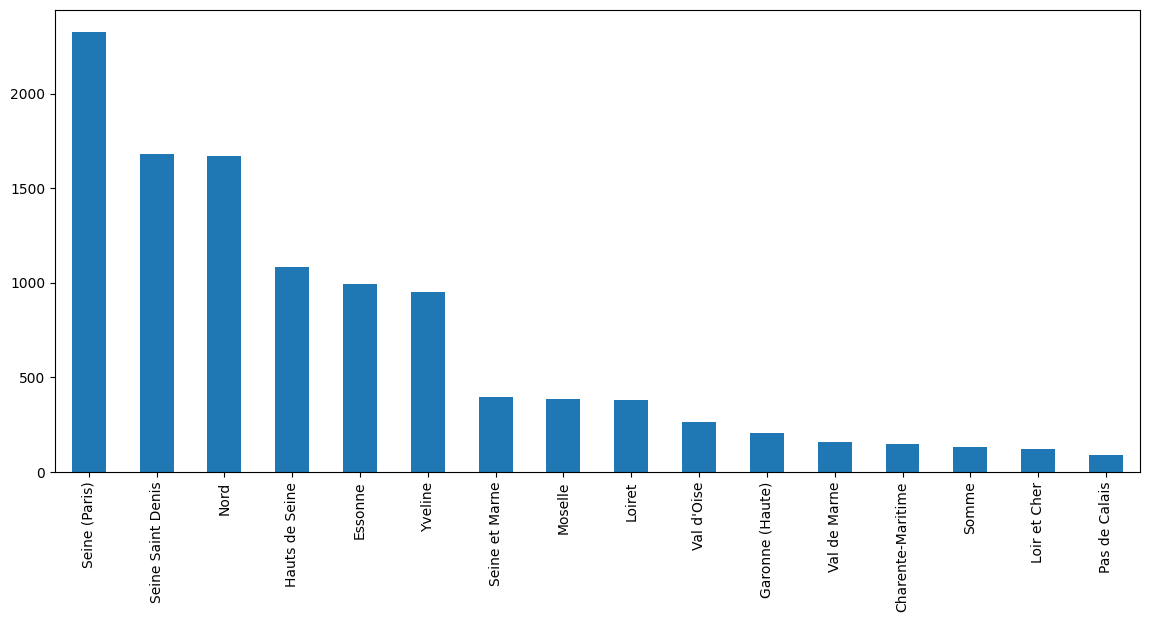

In [48]:
france_states.plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales were made per category?

In [ ]:
# your code goes here


In [49]:
sales['Product_Category'].value_counts()

Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

Go ahead and show a <b>pie plot</b> with the results:

In [ ]:
# your code goes here


<Axes: ylabel='Product_Category'>

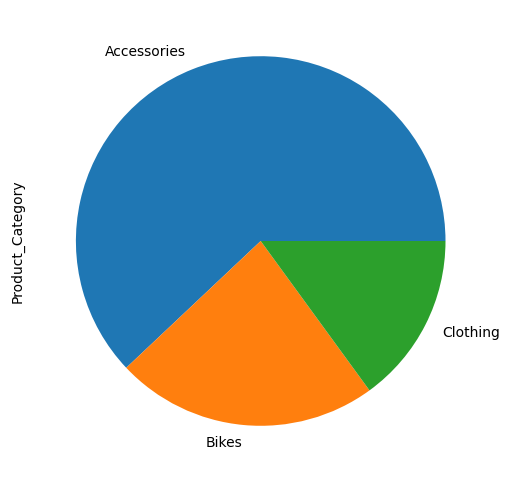

In [50]:
sales['Product_Category'].value_counts().plot(kind='pie', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made per accessory sub-categories?

In [ ]:
# your code goes here


In [51]:
accessories = sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()

accessories

Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

Go ahead and show a <b>bar plot</b> with the results:

In [ ]:
# your code goes here


<Axes: >

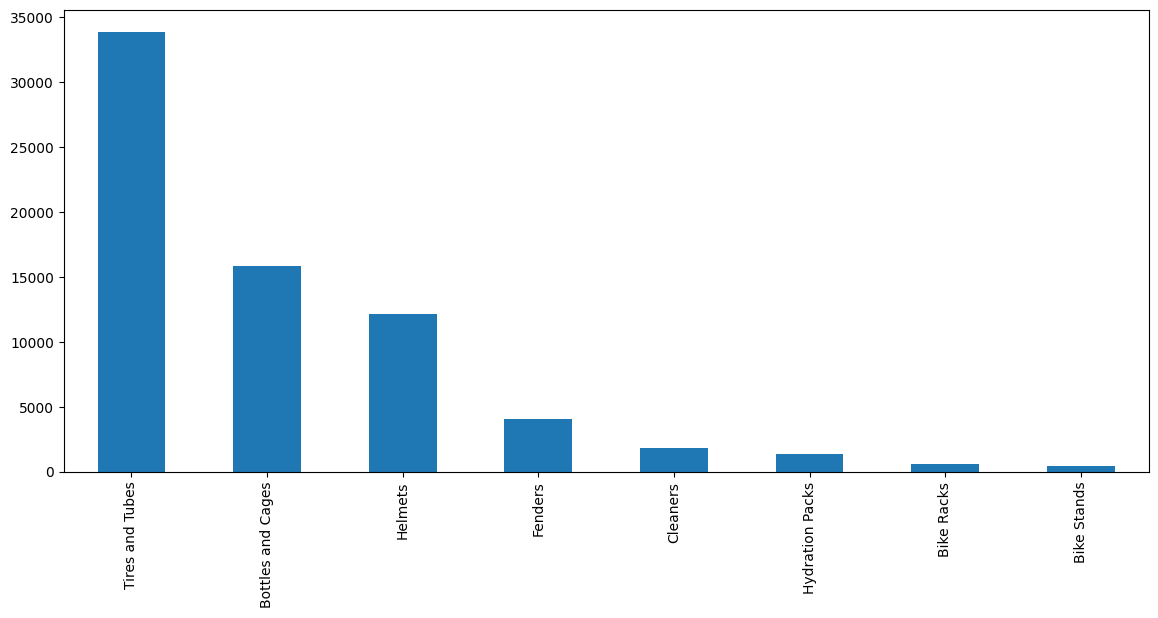

In [52]:
accessories.plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made per bike sub-categories?

In [ ]:
# your code goes here


In [53]:
bikes = sales.loc[sales['Product_Category'] == 'Bikes', 'Sub_Category'].value_counts()

bikes

Road Bikes        13430
Mountain Bikes     8854
Touring Bikes      3698
Name: Sub_Category, dtype: int64

Go ahead and show a <b>pie plot</b> with the results:

In [ ]:
# your code goes here


<Axes: ylabel='Sub_Category'>

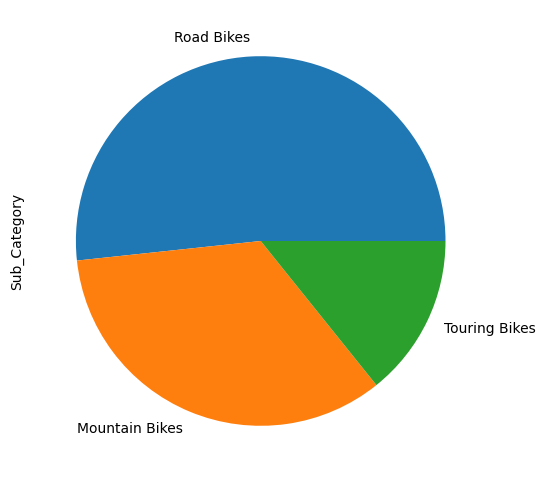

In [54]:
bikes.plot(kind='pie', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which gender has the most amount of sales?

In [ ]:
# your code goes here


In [55]:
sales['Customer_Gender'].value_counts()

M    58312
F    54724
Name: Customer_Gender, dtype: int64

<Axes: >

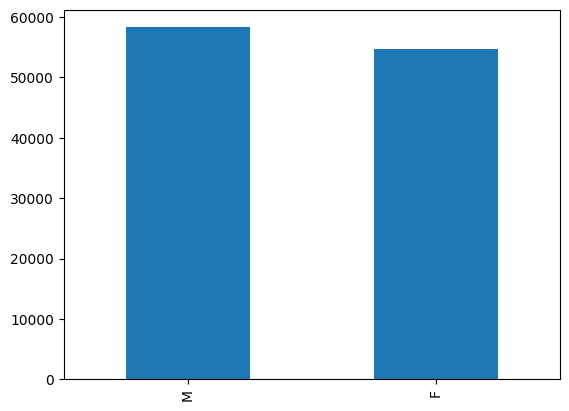

In [56]:
sales['Customer_Gender'].value_counts().plot(kind='bar')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales with more than 500 in `Revenue` were made by men?

In [ ]:
# your code goes here


In [57]:
sales.loc[(sales['Customer_Gender'] == 'M') & (sales['Revenue'] == 500)].shape[0]

9

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get the top-5 sales with the highest revenue

In [ ]:
# your code goes here


In [58]:
sales.sort_values(['Revenue'], ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58174,2015-07-24
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54169,2013-07-24
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14412,2011-07-08
70307,2011-04-30,30,April,2011,44,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14269,2011-04-30
70601,2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14269,2011-09-30


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get the sale with the highest revenue

In [ ]:
# your code goes here


In [59]:
#sales.sort_values(['Revenue'], ascending=False).head(1)

cond = sales['Revenue'] == sales['Revenue'].max()

sales.loc[cond]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58174,2015-07-24


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the mean `Order_Quantity` of orders with more than 10K in revenue?

In [ ]:
# your code goes here


In [60]:
cond = sales['Revenue'] > 10_000

sales.loc[cond, 'Order_Quantity'].mean()

3.6853932584269664

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the mean `Order_Quantity` of orders with less than 10K in revenue?

In [ ]:
# your code goes here


In [61]:
cond = sales['Revenue'] < 10_000

sales.loc[cond, 'Order_Quantity'].mean()

11.914618369987064

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in May of 2016?

In [ ]:
# your code goes here


In [62]:
cond = (sales['Year'] == 2016) & (sales['Month'] == 'May')

sales.loc[cond].shape[0]

5015

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made between May and July of 2016?

In [ ]:
# your code goes here


In [63]:
cond = (sales['Year'] == 2016) & (sales['Month'].isin(['May', 'June', 'July']))

sales.loc[cond].shape[0]

12164

Show a grouped <b>box plot</b> per month with the profit values.

In [ ]:
# your code goes here


<Axes: title={'center': 'Profit'}, xlabel='[Month]'>

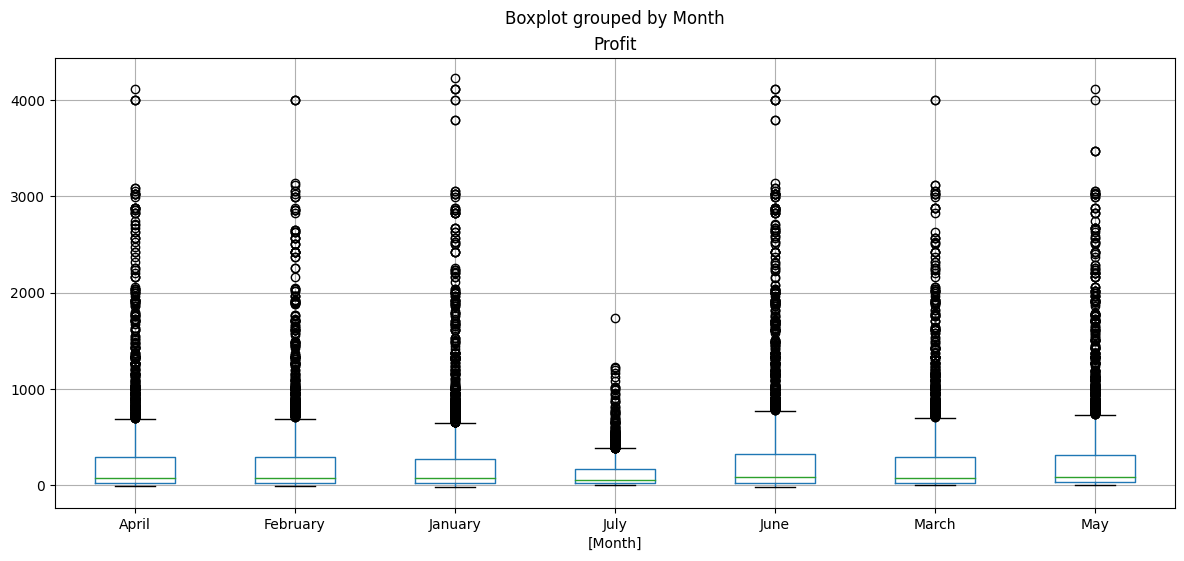

In [64]:
profit_2016 = sales.loc[sales['Year'] == 2016, ['Profit', 'Month']]

profit_2016.boxplot(by='Month', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add 7.2% TAX on every sale `Unit_Price` within United States

In [ ]:
# your code goes here


In [65]:
#sales.loc[sales['Country'] == 'United States', 'Unit_Price'] = sales.loc[sales['Country'] == 'United States', 'Unit_Price'] * 1.072

sales.loc[sales['Country'] == 'United States', 'Unit_Price'] *= 1.072

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)